In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


# Loading the Data

In [2]:
#Serie A
#saving each season as a data frame
#Data frames from Football-Data
df1_fbd = pd.read_csv("serie0910.csv")
df2_fbd = pd.read_csv("serie1011.csv")
df3_fbd = pd.read_csv("serie1112.csv")
df4_fbd = pd.read_csv("serie1213.csv")
df5_fbd = pd.read_csv("serie1314.csv")
df6_fbd = pd.read_csv("serie1415.csv")
df7_fbd = pd.read_csv("serie1516.csv")
df8_fbd = pd.read_csv("serie1617.csv")
df9_fbd = pd.read_csv("serie1718.csv")
df10_fbd = pd.read_csv("serie1819.csv")
df11_fbd = pd.read_csv("serie1920.csv")
df12_fbd = pd.read_csv("serie2021.csv")

#Renaming teams so df_fbref and df_fbd match 
team_mapping = {
    'Hellas Verona':'Verona',
    'SPAL': 'Spal',
} 

#2009/10 Season
df1_fbd = df1_fbd.iloc[:, :22] #removing betting data
df1_fbref = pd.read_html('https://fbref.com/en/comps/11/2009-2010/2009-2010-Serie-A-Stats')[0]
df1_fbref = df1_fbref.iloc[:, [1,11]] #extracting the home team and attendance
df1 = df1_fbd.merge(df1_fbref, left_on='HomeTeam', right_on = 'Squad', how='left')
# Removing Squad column
df1 = df1.drop('Squad', axis=1)

#2010/11 Season
df2_fbd = df2_fbd.iloc[:, :22] #removing betting data
df2_fbref = pd.read_html('https://fbref.com/en/comps/11/2010-2011/2010-2011-Serie-A-Stats')[0]
df2_fbref = df2_fbref.iloc[:, [1,11]] #extracting the home team and attendance
df2 = df2_fbd.merge(df2_fbref, left_on='HomeTeam', right_on = 'Squad', how='left')
# Removing Squad column
df2 = df2.drop('Squad', axis=1)

#2011/12 Season
df3_fbd = df3_fbd.iloc[:, :22] #removing betting data
df3_fbref = pd.read_html('https://fbref.com/en/comps/11/2011-2012/2011-2012-Serie-A-Stats')[0]
df3_fbref = df3_fbref.iloc[:, [1,11]] #extracting the home team and attendance
df3 = df3_fbd.merge(df3_fbref, left_on='HomeTeam', right_on = 'Squad', how='left')
# Removing Squad column
df3 = df3.drop('Squad', axis=1)

#2012/13 Season
df4_fbd = df4_fbd.iloc[:, :22] #removing betting data
df4_fbref = pd.read_html('https://fbref.com/en/comps/11/2012-2013/2012-2013-Serie-A-Stats')[0]
df4_fbref = df4_fbref.iloc[:, [1,11]] #extracting the home team and attendance
df4 = df4_fbd.merge(df4_fbref, left_on='HomeTeam', right_on = 'Squad', how='left')
# Removing Squad column
df4 = df4.drop('Squad', axis=1)

#2013/14 Season
df5_fbd = df5_fbd.iloc[:, :22] #removing betting data
df5_fbref = pd.read_html('https://fbref.com/en/comps/11/2013-2014/2013-2014-Serie-A-Stats')[0]
df5_fbref = df5_fbref.iloc[:, [1,11]] #extracting the home team and attendance
df5_fbref['Squad'] = df5_fbref['Squad'].replace(team_mapping) #renaming
df5 = df5_fbd.merge(df5_fbref, left_on='HomeTeam', right_on = 'Squad', how='left')
# Removing Squad column
df5 = df5.drop('Squad', axis=1)


#2014/15 Season
df6_fbd = df6_fbd.iloc[:, :22] #Remove betting data
df6_fbref = pd.read_html('https://fbref.com/en/comps/11/2014-2015/schedule/2014-2015-Serie-A-Scores-and-Fixtures')[0]
df6_fbref = df6_fbref.dropna(how='all').reset_index(drop=True).iloc[:, [4, 6,7]] #Selecting the home, away and attendance columns
df6_fbref['Home'] = df6_fbref['Home'].replace(team_mapping)#Replacing home teams
df6_fbref['Away'] = df6_fbref['Away'].replace(team_mapping)#Replacing away teams
df6 = df6_fbd.merge(df6_fbref[['Home', 'Away', 'Attendance']], left_on=['HomeTeam', 'AwayTeam'], right_on=['Home', 'Away'], how='left')
df6_fbd['Attendance'] = df6['Attendance']
df6 = df6.drop(['Home', 'Away'], axis =1) #Drop home and away 


#2015/16 Season
df7_fbd = df7_fbd.iloc[:, :22] #Remove betting data
df7_fbref = pd.read_html('https://fbref.com/en/comps/11/2015-2016/schedule/2015-2016-Serie-A-Scores-and-Fixtures')[0]
df7_fbref = df7_fbref.dropna(how='all').reset_index(drop=True).iloc[:, [4, 6, 7]]  #Selecting the home, away and attendance columns
df7_fbref['Home'] = df7_fbref['Home'].replace(team_mapping)#Replacing home teams
df7_fbref['Away'] = df7_fbref['Away'].replace(team_mapping)#Replacing away teams
df7 = df7_fbd.merge(df7_fbref[['Home', 'Away', 'Attendance']], left_on=['HomeTeam', 'AwayTeam'], right_on=['Home', 'Away'], how='left')
df7_fbd['Attendance'] = df7['Attendance']
df7 = df7.drop(['Home', 'Away'], axis =1)#Drop home and away 

#2016/17 Season
df8_fbd = df8_fbd.iloc[:, :22] #Remove betting data
df8_fbref = pd.read_html('https://fbref.com/en/comps/11/2016-2017/schedule/2016-2017-Serie-A-Scores-and-Fixtures')[0]
df8_fbref = df8_fbref.dropna(how='all').reset_index(drop=True).iloc[:, [4,6, 7]]  #Selecting the home, away and attendance columns 
df8_fbref['Home'] = df8_fbref['Home'].replace(team_mapping)#Replacing home teams
df8_fbref['Away'] = df8_fbref['Away'].replace(team_mapping)#Replacing away teams
df8 = df8_fbd.merge(df8_fbref[['Home', 'Away', 'Attendance']], left_on=['HomeTeam', 'AwayTeam'], right_on=['Home', 'Away'], how='left')
df8_fbd['Attendance'] = df6['Attendance']
df8 = df8.drop(['Home', 'Away'], axis =1)#Drop home and away 

#2017/18 Season
df9_fbd = df9_fbd.iloc[:, :22] #Remove betting data
df9_fbref = pd.read_html('https://fbref.com/en/comps/11/2017-2018/schedule/2017-2018-Serie-A-Scores-and-Fixtures')[0]
df9_fbref = df9_fbref.dropna(how='all').reset_index(drop=True).iloc[:, [4, 8, 9]]   #Selecting the home, away and attendance columns
df9_fbref['Home'] = df9_fbref['Home'].replace(team_mapping)#Replacing home teams
df9_fbref['Away'] = df9_fbref['Away'].replace(team_mapping)#Replacing away teams
df9 = df9_fbd.merge(df9_fbref[['Home', 'Away', 'Attendance']], left_on=['HomeTeam', 'AwayTeam'], right_on=['Home', 'Away'], how='left')
df9_fbd['Attendance'] = df9['Attendance']
df9 = df9.drop(['Home', 'Away'], axis =1)#Drop home and away 

#2018/19 Season
df10_fbd = df10_fbd.iloc[:, :22] #Remove betting data
df10_fbref = pd.read_html('https://fbref.com/en/comps/11/2018-2019/schedule/2018-2019-Serie-A-Scores-and-Fixtures')[0]
df10_fbref = df10_fbref.dropna(how='all').reset_index(drop=True).iloc[:, [4,8,9]]   #Selecting the home, away and attendance columns
df10_fbref['Home'] = df10_fbref['Home'].replace(team_mapping)#Replacing home teams
df10_fbref['Away'] = df10_fbref['Away'].replace(team_mapping)#Replacing away teams
df10 = df10_fbd.merge(df10_fbref[['Home', 'Away', 'Attendance']], left_on=['HomeTeam', 'AwayTeam'], right_on=['Home', 'Away'], how='left')
df10_fbd['Attendance'] = df10['Attendance']
df10 = df10.drop(['Home', 'Away'], axis =1)#Drop home and away 


#2019/20 Season
df11_fbd = df11_fbd.iloc[:, :23] #Remove betting data
df11_fbref = pd.read_html('https://fbref.com/en/comps/11/2019-2020/schedule/2019-2020-Serie-A-Scores-and-Fixtures')[0]
df11_fbref = df11_fbref.dropna(how='all').reset_index(drop=True).iloc[:, [4, 8, 9]]  #Selecting the home, away and attendance columns 
df11_fbref['Home'] = df11_fbref['Home'].replace(team_mapping)#Replacing home teams
df11_fbref['Away'] = df11_fbref['Away'].replace(team_mapping)
df11 = df11_fbd.merge(df11_fbref[['Home', 'Away', 'Attendance']], left_on=['HomeTeam', 'AwayTeam'], right_on=['Home', 'Away'], how='left')
df11_fbd['Attendance'] = df11['Attendance']
df11 = df11.drop(['Home', 'Away'], axis =1)#Drop home and away 

#2020/21 Season
df12_fbd = df12_fbd.iloc[:, :23] #Remove betting data
df12_fbref = pd.read_html('https://fbref.com/en/comps/11/2020-2021/schedule/2020-2021-Serie-A-Scores-and-Fixtures')[0]
df12_fbref = df12_fbref.dropna(how='all').reset_index(drop=True).iloc[:, [4, 8, 9]] #Selecting the home, away and attendance columns 
df12_fbref['Home'] = df12_fbref['Home'].replace(team_mapping)#Replacing home teams
df12_fbref['Away'] = df12_fbref['Away'].replace(team_mapping)
df12 = df12_fbd.merge(df12_fbref[['Home', 'Away', 'Attendance']], left_on=['HomeTeam', 'AwayTeam'], right_on=['Home', 'Away'], how='left')
df12_fbd['Attendance'] = df12['Attendance']
df12 = df12.drop(['Home', 'Away'], axis =1)#Drop home and away 


#Adding all the Data frames together
serie_a = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12], axis=0).dropna(how='all').reset_index(drop=True) #remove empty rows

# Save the combined data frames to a new CSV file
serie_a.to_csv('serie_a.csv', index=False)

# Adding Season Column

In [3]:
# Create a Season column
start_year = 2009
serie_a['Season'] = [f"{start_year + i // 380}/{start_year + i // 380 + 1}" for i in range(len(serie_a))]

# Move the season column to be the second column
serie_a.insert(1, 'Season', serie_a.pop('Season'))

# Data Cleaning

In [4]:
serie_a.head(10)

,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,HF,AF,HC,AC,HY,AY,HR,AR,Attendance,Time
0,I1,2009/2010,22/08/09,Bologna,Fiorentina,1.0,1.0,D,1.0,0.0,...,17.0,20.0,4.0,9.0,1.0,1.0,0.0,0.0,20144.0,NaN
1,I1,2009/2010,22/08/09,Siena,Milan,1.0,2.0,A,1.0,1.0,...,22.0,11.0,5.0,8.0,2.0,1.0,0.0,0.0,11071.0,NaN
2,I1,2009/2010,23/08/09,Catania,Sampdoria,1.0,2.0,A,1.0,1.0,...,29.0,13.0,11.0,4.0,4.0,2.0,1.0,0.0,15342.0,NaN
3,I1,2009/2010,23/08/09,Genoa,Roma,3.0,2.0,H,0.0,0.0,...,20.0,13.0,8.0,5.0,5.0,2.0,0.0,0.0,25350.0,NaN
4,I1,2009/2010,23/08/09,Inter,Bari,1.0,1.0,D,0.0,0.0,...,20.0,14.0,10.0,1.0,3.0,2.0,0.0,0.0,56368.0,NaN
5,I1,2009/2010,23/08/09,Juventus,Chievo,1.0,0.0,H,1.0,0.0,...,15.0,14.0,9.0,2.0,3.0,2.0,0.0,0.0,23339.0,NaN
6,I1,2009/2010,23/08/09,Lazio,Atalanta,1.0,0.0,H,1.0,0.0,...,21.0,17.0,3.0,9.0,3.0,3.0,0.0,0.0,36551.0,NaN
7,I1,2009/2010,23/08/09,Livorno,Cagliari,0.0,0.0,D,0.0,0.0,...,16.0,13.0,4.0,5.0,1.0,1.0,0.0,0.0,10668.0,NaN
8,I1,2009/2010,23/08/09,Palermo,Napoli,2.0,1.0,H,1.0,0.0,...,20.0,10.0,4.0,10.0,4.0,2.0,0.0,0.0,25138.0,NaN
9,I1,2009/2010,23/08/09,Udinese,Parma,2.0,2.0,D,1.0,1.0,...,15.0,19.0,7.0,3.0,3.0,3.0,0.0,0.0,17028.0,NaN


In [5]:
#Shape
serie_a.shape

(4560, 25)

In [6]:
#Checking missing values
serie_a.isnull().sum()

Div              0
Season           0
Date             0
HomeTeam         0
AwayTeam         0
FTHG             0
FTAG             0
FTR              0
HTHG             2
HTAG             2
HTR              2
HS               1
AS               1
HST              1
AST              1
HF               1
AF               1
HC               1
AC               1
HY               2
AY               1
HR               1
AR               1
Attendance     467
Time          3800
dtype: int64

In [7]:
#2012/13 Cagliari v Roma, match did not take place due to secuity concerns
# roma was awarded the win 
# all match variables, except ftr, fthg, and ftag, will have 0
serie_a.iloc[serie_a[serie_a['HS'].isnull()].index]
serie_a.loc[1174,  ['HTHG', 'HTAG', 'HS', 'AS', 'HST','AST','HF','AF','HC','AC','HY','AY','HR','AR','Attendance']] = 0
serie_a.loc[1174, ['HTR']] = 'D'


In [8]:
#2016/17 Sassuolo Pescara, Sassuolo given the loss after the game due to an eneligible player
serie_a.iloc[serie_a[serie_a['HTHG'].isnull()].index]

serie_a.loc[2677, ['HTHG', 'HTAG']] = 0
serie_a.loc[2677, ['HTR']] = 'D'

serie_a.iloc[2677]

Div                  I1
Season        2016/2017
Date           28/08/16
HomeTeam       Sassuolo
AwayTeam        Pescara
FTHG                0.0
FTAG                3.0
FTR                   A
HTHG                0.0
HTAG                0.0
HTR                   D
HS                 13.0
AS                 15.0
HST                 3.0
AST                 5.0
HF                 12.0
AF                 21.0
HC                  2.0
AC                  7.0
HY                  2.0
AY                  2.0
HR                  0.0
AR                  0.0
Attendance       9071.0
Time                NaN
Name: 2677, dtype: object

In [9]:
#Column missing the home yellow, home teams average of the season taken and filled in 
missing_home_yellow_rows = serie_a.iloc[serie_a[serie_a['HY'].isnull()].index]


#Iterate over the missing rows and fill in the missing home yellow values
for index, row in missing_home_yellow_rows.iterrows():
    # Extract relevant information from the current row
    home_team = row['HomeTeam']
    season = row['Season']

    # Calculate the average fouls for the HomeTeam in the current season
    average_home_yellows = serie_a[(serie_a['HomeTeam'] == home_team) & (serie_a['Season'] == season)]['HY'].mean()

    # Fill in the missing fouls value with the calculated average
    serie_a.at[index, 'HY'] = round(average_home_yellows, 0)


Div                  I1
Season        2014/2015
Date           02/03/15
HomeTeam           Roma
AwayTeam       Juventus
FTHG                1.0
FTAG                1.0
FTR                   D
HTHG                0.0
HTAG                0.0
HTR                   D
HS                  8.0
AS                 10.0
HST                 3.0
AST                 1.0
HF                 11.0
AF                 16.0
HC                  1.0
AC                  5.0
HY                  2.0
AY                  5.0
HR                  1.0
AR                  0.0
Attendance      55651.0
Time                NaN
Name: 2147, dtype: object

In [10]:
#Change the attendacne for matches that incorrect on fbref
serie_a.at[2714, 'Attendance'] = 10100
serie_a.at[2438, 'Attendance'] = 16544
serie_a.at[2520, 'Attendance'] = 10000
serie_a.at[2485, 'Attendance'] = 17118
serie_a.at[4014, 'Attendance'] = 40000
serie_a.at[3166, 'Attendance'] = 15633
serie_a.at[3961, 'Attendance'] = 33055
serie_a.at[3067, 'Attendance'] = 14032
serie_a.at[2485, 'Attendance'] = 17118


In [11]:
#Creating a data frame of mahces before covid
serie_a_pre_covid = serie_a.iloc[0:4049]
#Finding matches with missing attendance
serie_a_pre_covid[serie_a_pre_covid['Attendance'].isnull()]

,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,HF,AF,HC,AC,HY,AY,HR,AR,Attendance,Time
3432,I1,2018/2019,26/08/2018,Frosinone,Bologna,0.0,0.0,D,0.0,0.0,...,15.0,12.0,2.0,5.0,2.0,1.0,0.0,0.0,NaN,NaN


In [12]:
#Identify rows with missing attendance values in the first 4049 rows
missing_attendance_rows = serie_a.loc[:4049][pd.isnull(serie_a.loc[:4049, 'Attendance'])]

#Iterate over the missing rows and fill in the missing attendance values
for index, row in missing_attendance_rows.iterrows():
    # Extract relevant information from the current row
    home_team = row['HomeTeam']
    season = row['Season']

    # Calculate the average attendance for the HomeTeam in the current season
    average_attendance = serie_a[(serie_a['HomeTeam'] == home_team) & (serie_a['Season'] == season)]['Attendance'].mean()

    # Fill in the missing attendance value with the calculated average
    serie_a.at[index, 'Attendance'] = round(average_attendance, 0)

    
#Replace all missing values with zero 
serie_a['Attendance'].fillna(0, inplace=True) 

In [13]:
#removing time
serie_a = serie_a.drop('Time', axis =1)

In [14]:
#checking again for missing values
serie_a.isnull().sum()

Div           0
Season        0
Date          0
HomeTeam      0
AwayTeam      0
FTHG          0
FTAG          0
FTR           0
HTHG          0
HTAG          0
HTR           0
HS            0
AS            0
HST           0
AST           0
HF            0
AF            0
HC            0
AC            0
HY            0
AY            0
HR            0
AR            0
Attendance    0
dtype: int64

In [15]:
#display the data types
serie_a.dtypes

Div            object
Season         object
Date           object
HomeTeam       object
AwayTeam       object
FTHG          float64
FTAG          float64
FTR            object
HTHG          float64
HTAG          float64
HTR            object
HS            float64
AS            float64
HST           float64
AST           float64
HF            float64
AF            float64
HC            float64
AC            float64
HY            float64
AY            float64
HR            float64
AR            float64
Attendance    float64
dtype: object

In [16]:
#check for duplicates
serie_a.duplicated().sum()

0

In [17]:
#Describe the data
serie_a.describe().T

,count,mean,std,min,25%,50%,75%,max
FTHG,4560.0,1.526754,1.256764,0.0,1.0,1.0,2.0,7.0
FTAG,4560.0,1.199781,1.134032,0.0,0.0,1.0,2.0,7.0
HTHG,4560.0,0.676754,0.836953,0.0,0.0,0.0,1.0,5.0
HTAG,4560.0,0.515351,0.726300,0.0,0.0,0.0,1.0,5.0
HS,4560.0,13.773904,5.375970,0.0,10.0,13.0,17.0,39.0
AS,4560.0,11.350439,4.599370,0.0,8.0,11.0,14.0,30.0
HST,4560.0,5.153070,2.660804,0.0,3.0,5.0,7.0,18.0
AST,4560.0,4.175877,2.403338,0.0,2.0,4.0,6.0,16.0
HF,4560.0,14.537500,4.432813,0.0,11.0,14.0,17.0,38.0
AF,4560.0,14.821053,4.567065,0.0,12.0,15.0,18.0,34.0


# Adding New Variables

In [18]:
# Home team average goals scored at home full time
serie_a['HAGSFT'] = (
    serie_a.groupby(['Season', 'HomeTeam'])['FTHG']  # Grouping by season and home team, selecting FTHG
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)


#Away team average goals scored away full time 
serie_a['AAGSFT'] = (
    serie_a.groupby(['Season', 'AwayTeam'])['FTAG'] #Grouping by season and home team, selecting FTAG
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)



#Home team average goals scored at home half time
serie_a['HAGSHT'] = (
    serie_a.groupby(['Season', 'HomeTeam'])['HTHG'] #Grouping by season and home team, selecting HTHG
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)

#Away team average goals scored away half time 
serie_a['AAGSHT'] = (
    serie_a.groupby(['Season', 'AwayTeam'])['HTAG'] #Grouping by season and home team, selecting HTAG
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)



# Home team average goals conceded at home fill time
serie_a['HAGCFT'] = (
    serie_a.groupby(['Season', 'HomeTeam'])['FTAG']  # Grouping by season and home team, selecting FTAG
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)

# Away team average goals conceded away full time 
serie_a['AAGCFT'] = (
    serie_a.groupby(['Season', 'AwayTeam'])['FTHG']  # Grouping by season and away team, selecting FTHG
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)


#Home team average red cards at home 
serie_a['HAR'] = (
    serie_a.groupby(['Season', 'HomeTeam'])['HR'] #Grouping by season and home team, selecting HR
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)

#Away team average red cards away 
serie_a['AAR'] = (
    serie_a.groupby(['Season', 'AwayTeam'])['AR'] #Grouping by season and home team, selecting AR
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)



#Home team average yellow cards at home 
serie_a['HAY'] = (
    serie_a.groupby(['Season', 'HomeTeam'])['HY'] #Grouping by season and home team, selecting HY
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)

#Away team average yellow cards away 
serie_a['AAY'] = (
    serie_a.groupby(['Season', 'AwayTeam'])['AY'] #Grouping by season and home team, selecting AY
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)


#Home team average fouls at home 
serie_a['HAF'] = (
    serie_a.groupby(['Season', 'HomeTeam'])['HF'] #Grouping by season and home team, selecting HF
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)

#Away team average fouls away 
serie_a['AAF'] = (
    serie_a.groupby(['Season', 'AwayTeam'])['AF'] #Grouping by season and home team, selecting AF
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)



#Home team average corners at home 
serie_a['HAC'] = (
    serie_a.groupby(['Season', 'HomeTeam'])['HC'] #Grouping by season and home team, selecting HC
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)

#Away team average corners away 
serie_a['AAC'] = (
    serie_a.groupby(['Season', 'AwayTeam'])['AC'] #Grouping by season and home team, selecting AC
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)



#Home team average shots at home 
serie_a['HAS'] = (
    serie_a.groupby(['Season', 'HomeTeam'])['HS'] #Grouping by season and home team, selecting AS
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)

#Away team average shots away 
serie_a['AAS'] = (
    serie_a.groupby(['Season', 'AwayTeam'])['AS'] #Grouping by season and home team, selecting HS
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)



#Home team average shots on target at home 
serie_a['HAST'] = (
    serie_a.groupby(['Season', 'HomeTeam'])['HST'] #Grouping by season and home team, selecting HST
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)

#Away team average shots on target away 
serie_a['AAST'] = (
    serie_a.groupby(['Season', 'AwayTeam'])['AST'] #Grouping by season and home team, selecting AST
    .transform(lambda x: x.expanding().mean().shift().fillna(0))  # calculate the expanding mean, shift, and fill NaN with 0
)







#Home team percentage of games won, lost and drawn at home
# Create new columns to store cumulative statistics for each HomeTeam's away games
serie_a['home_games'] = 0
serie_a['home_won'] = 0
serie_a['home_lost'] = 0
serie_a['home_drawn'] = 0

# Create dictionary to keep track of cumulative statistics for each HomeTeam within each season
cumulative_stats_by_season = {}

# Iterate through each row 
for index, row in serie_a.iterrows():
    home_team = row['HomeTeam']
    season = row['Season']

    # If the AwayTeam is not in the dictionary for the current season, all stats are zero
    if (home_team, season) not in cumulative_stats_by_season:
        cumulative_stats_by_season[(home_team, season)] = {'home_games': 0, 'home_won': 0, 'home_lost': 0, 'home_drawn': 0}

    # Update cumulative statistics based on the FTR result
    cumulative_stats_by_season[(home_team, season)]['home_games'] += 1
    cumulative_stats_by_season[(home_team, season)]['home_won'] += (row['FTR'] == 'H')
    cumulative_stats_by_season[(home_team, season)]['home_lost'] += (row['FTR'] == 'A')
    cumulative_stats_by_season[(home_team, season)]['home_drawn'] += (row['FTR'] == 'D')

    # Assign cumulative statistics to the corresponding columns in the DataFrame
    serie_a.at[index, 'home_games'] = cumulative_stats_by_season[(home_team, season)]['home_games']
    serie_a.at[index, 'home_won'] = cumulative_stats_by_season[(home_team, season)]['home_won']
    serie_a.at[index, 'home_lost'] = cumulative_stats_by_season[(home_team, season)]['home_lost']
    serie_a.at[index, 'home_drawn'] = cumulative_stats_by_season[(home_team, season)]['home_drawn']

    # If it's the first match of a new season, reset the cumulative stats for that AwayTeam
    if index > 0 and season != serie_a.at[index - 1, 'Season']:
        cumulative_stats_by_season[(home_team, season)] = {'home_games': 0, 'home_won': 0, 'home_lost': 0, 'home_drawn': 0}

#For each team shift the statsitcs down a row 
serie_a['home_won'] = serie_a.groupby('HomeTeam')['home_won'].transform(lambda x: x.shift(1))
serie_a['home_drawn'] = serie_a.groupby('HomeTeam')['home_drawn'].transform(lambda x: x.shift(1))
serie_a['home_lost'] = serie_a.groupby('HomeTeam')['home_lost'].transform(lambda x: x.shift(1))
serie_a['home_games'] = serie_a.groupby('HomeTeam')['home_games'].transform(lambda x: x.shift(1))
# Replace NaN values in the columns with 0
serie_a['home_won'].fillna(0, inplace=True)
serie_a['home_drawn'].fillna(0, inplace=True)
serie_a['home_lost'].fillna(0, inplace=True)
serie_a['home_games'].fillna(0, inplace=True)

#calculate the means for each row
serie_a['HAWH'] = serie_a['home_won'] / serie_a['home_games']
serie_a['HALH'] = serie_a['home_lost'] / serie_a['home_games']
serie_a['HADH'] = serie_a['home_drawn'] / serie_a['home_games']


# Identify the first row of each AwayTeam in a new season
first_row_mask = serie_a.groupby(['Season', 'HomeTeam']).cumcount() == 0
# Set the values to zero
serie_a.loc[first_row_mask, ['HAWH', 'HALH', 'HADH']] = 0

#Remove the rows from the data frame 
serie_a =serie_a.drop(columns=['home_won','home_lost','home_drawn','home_games'],axis=1)







#Away team decimal of games won lost and drawn at home per season
# Create new columns to store cumulative statistics for each AwayTeam's away games
serie_a['away_games'] = 0
serie_a['away_won'] = 0
serie_a['away_lost'] = 0
serie_a['away_drawn'] = 0

# Create dictionary to keep track of cumulative statistics for each AwayTeam within each season
cumulative_stats_by_season = {}

# Iterate through each row 
for index, row in serie_a.iterrows():
    away_team = row['AwayTeam']
    season = row['Season']

    # If the AwayTeam is not in the dictionary for the current season, all stats are zero
    if (away_team, season) not in cumulative_stats_by_season:
        cumulative_stats_by_season[(away_team, season)] = {'away_games': 0, 'away_won': 0, 'away_lost': 0, 'away_drawn': 0}

    # Update cumulative statistics based on the FTR result
    cumulative_stats_by_season[(away_team, season)]['away_games'] += 1
    cumulative_stats_by_season[(away_team, season)]['away_won'] += (row['FTR'] == 'A')
    cumulative_stats_by_season[(away_team, season)]['away_lost'] += (row['FTR'] == 'H')
    cumulative_stats_by_season[(away_team, season)]['away_drawn'] += (row['FTR'] == 'D')

    # Assign cumulative statistics to the corresponding columns in the data frame
    serie_a.at[index, 'away_games'] = cumulative_stats_by_season[(away_team, season)]['away_games']
    serie_a.at[index, 'away_won'] = cumulative_stats_by_season[(away_team, season)]['away_won']
    serie_a.at[index, 'away_lost'] = cumulative_stats_by_season[(away_team, season)]['away_lost']
    serie_a.at[index, 'away_drawn'] = cumulative_stats_by_season[(away_team, season)]['away_drawn']

    # If it's the first match of a new season, reset the cumulative stats for that AwayTeam
    if index > 0 and season != serie_a.at[index - 1, 'Season']:
        cumulative_stats_by_season[(away_team, season)] = {'away_games': 0, 'away_won': 0, 'away_lost': 0, 'away_drawn': 0}

#For each team shift the statsitcs down a row 
serie_a['away_won'] = serie_a.groupby('AwayTeam')['away_won'].transform(lambda x: x.shift(1))
serie_a['away_drawn'] = serie_a.groupby('AwayTeam')['away_drawn'].transform(lambda x: x.shift(1))
serie_a['away_lost'] = serie_a.groupby('AwayTeam')['away_lost'].transform(lambda x: x.shift(1))
serie_a['away_games'] = serie_a.groupby('AwayTeam')['away_games'].transform(lambda x: x.shift(1))
# Replace NaN values in the columns with 0
serie_a['away_won'].fillna(0, inplace=True)
serie_a['away_drawn'].fillna(0, inplace=True)
serie_a['away_lost'].fillna(0, inplace=True)
serie_a['away_games'].fillna(0, inplace=True)

#calculate the means for each row
serie_a['AAWA'] = serie_a['away_won'] / serie_a['away_games']
serie_a['AALA'] = serie_a['away_lost'] / serie_a['away_games']
serie_a['AADA'] = serie_a['away_drawn'] / serie_a['away_games']


# Identify the first row of each AwayTeam in a new season
first_row_mask = serie_a.groupby(['Season', 'AwayTeam']).cumcount() == 0
# Set the values to zero
serie_a.loc[first_row_mask, ['AAWA', 'AALA', 'AADA']] = 0

#Remove the rows from the data frame 
serie_a =serie_a.drop(columns=['away_won','away_lost','away_drawn','away_games'],axis=1)

In [19]:
#Adding a new column for if the match was pre or during covid
# Set 'pre_covid' to True for rows up to index 4069, and False for rows after that index
serie_a['Pre_covid'] = serie_a.index <= 4049

#Creating pre and during covid data frame
serie_a_pre_covid = serie_a[serie_a['Pre_covid'] == True]
serie_a_during_covid = serie_a[serie_a['Pre_covid'] == False]

In [20]:
# Create initial columns for HomeTeamPoints and AwayTeamPoints
serie_a['HomeTeamPoints'] = 0
serie_a['AwayTeamPoints'] = 0

# Function to update points based on match result
def update_points(row):
    if row['FTR'] == 'H':
        row['HomeTeamPoints'] += 3
    elif row['FTR'] == 'D':
        row['HomeTeamPoints'] += 1
        row['AwayTeamPoints'] += 1
    elif row['FTR'] == 'A':
        row['AwayTeamPoints'] += 3
    return row

# Apply the update_points function to each row
serie_a = serie_a.apply(update_points, axis=1)

# Create running tally of points for each team for each season
serie_a['HomeTeamPoints'] = serie_a.groupby(['Season', 'HomeTeam'])['HomeTeamPoints'].cumsum()
serie_a['AwayTeamPoints'] = serie_a.groupby(['Season', 'AwayTeam'])['AwayTeamPoints'].cumsum()




# Create a data frame to store total points for each team within each season
total_points_home = serie_a.groupby(['Season', 'HomeTeam'])['HomeTeamPoints'].max().reset_index()
total_points_away = serie_a.groupby(['Season', 'AwayTeam'])['AwayTeamPoints'].max().reset_index()

# Merge the data frame to combine home and away points
total_points = pd.merge(total_points_home, total_points_away, how='outer', left_on=['Season', 'HomeTeam'], right_on=['Season', 'AwayTeam'], suffixes=('_Home', '_Away'))

# Calculate total points for each team by combining home and away points
total_points['TotalPoints'] = total_points['HomeTeamPoints'] + total_points['AwayTeamPoints']

# Calculate HA as the ratio of home points to the sum of home points and away points to 4 decimal places
total_points['SeasonHA'] = round(total_points['HomeTeamPoints'] / (total_points['HomeTeamPoints'] + total_points['AwayTeamPoints']), 4)


# Calculate OverallHA for each team by summing overall home points and away points, then applying the formula H / (H + A) to 4 decimal places
overall_ha = total_points.groupby('HomeTeam', as_index=False).agg({'HomeTeamPoints': 'sum', 'AwayTeamPoints': 'sum'})
overall_ha['OverallHA'] = round(overall_ha['HomeTeamPoints'] / (overall_ha['HomeTeamPoints'] + overall_ha['AwayTeamPoints']), 4)


# Merge SeasonHA and OverallHA into the total_points data frame
total_points = pd.merge(total_points, overall_ha[['HomeTeam', 'OverallHA']], how='left', left_on='HomeTeam', right_on='HomeTeam')

# Sort the DataFrame by 'Season' and 'TotalPoints' columns
total_points = total_points.sort_values(by=['Season', 'TotalPoints'], ascending=[True, False])

total_points = total_points[['Season', 'HomeTeam', 'HomeTeamPoints', 'AwayTeamPoints', 'TotalPoints', 'SeasonHA', 'OverallHA']]
total_points.columns = ['Season', 'Team', 'Home Points', 'Away Points', 'Total Points', 'SeasonalHA', 'OverallHA']



In [21]:
# Create initial columns for HomeTeamPoints and AwayTeamPoints for pre covid
serie_a_pre_covid['HomeTeamPoints'] = 0
serie_a_pre_covid['AwayTeamPoints'] = 0

# Function to update points based on match result
def update_points(row):
    if row['FTR'] == 'H':
        row['HomeTeamPoints'] += 3
    elif row['FTR'] == 'D':
        row['HomeTeamPoints'] += 1
        row['AwayTeamPoints'] += 1
    elif row['FTR'] == 'A':
        row['AwayTeamPoints'] += 3
    return row

# Apply the update_points function to each row
serie_a_pre_covid = serie_a_pre_covid.apply(update_points, axis=1)

# Create running tally of points for each team for each season
serie_a_pre_covid['HomeTeamPoints'] = serie_a_pre_covid.groupby(['Season', 'HomeTeam'])['HomeTeamPoints'].cumsum()
serie_a_pre_covid['AwayTeamPoints'] = serie_a_pre_covid.groupby(['Season', 'AwayTeam'])['AwayTeamPoints'].cumsum()


# Create initial columns for HomeTeamPoints and AwayTeamPoints for during covid
serie_a_during_covid['HomeTeamPoints'] = 0
serie_a_during_covid['AwayTeamPoints'] = 0


# Apply the update_points function to each row
serie_a_during_covid = serie_a_during_covid.apply(update_points, axis=1)

# Create running tally of points for each team for each season
serie_a_during_covid['HomeTeamPoints'] = serie_a_during_covid.groupby(['Season', 'HomeTeam'])['HomeTeamPoints'].cumsum()
serie_a_during_covid['AwayTeamPoints'] = serie_a_during_covid.groupby(['Season', 'AwayTeam'])['AwayTeamPoints'].cumsum()


In [22]:
# Calculate total points for each team within each season

# Create a DataFrame to store total points for each team within each season
total_points_home_pre = serie_a_pre_covid.groupby(['Season', 'HomeTeam'])['HomeTeamPoints'].max().reset_index()
total_points_home_during = serie_a_during_covid.groupby(['Season', 'HomeTeam'])['HomeTeamPoints'].max().reset_index()
total_points_away_pre = serie_a_pre_covid.groupby(['Season', 'AwayTeam'])['AwayTeamPoints'].max().reset_index()
total_points_away_during = serie_a_during_covid.groupby(['Season', 'AwayTeam'])['AwayTeamPoints'].max().reset_index()

#Aggregate the total points foe each team across the seasons 
total_points_home_pre = total_points_home_pre.groupby('HomeTeam')['HomeTeamPoints'].sum().reset_index()
total_points_home_during = total_points_home_during.groupby('HomeTeam')['HomeTeamPoints'].sum().reset_index()
total_points_away_pre = total_points_away_pre.groupby('AwayTeam')['AwayTeamPoints'].sum().reset_index()
total_points_away_during = total_points_away_during.groupby('AwayTeam')['AwayTeamPoints'].sum().reset_index()

#Rename columns for clarity 
total_points_home_pre= total_points_home_pre.rename(columns={'HomeTeamPoints':'HomePointsPreCovid', 'HomeTeam':'Team'})
total_points_home_during= total_points_home_during.rename(columns={'HomeTeamPoints':'HomePointsDuringCovid','HomeTeam':'Team'})
total_points_away_pre= total_points_away_pre.rename(columns={'AwayTeamPoints':'AwayPointsPreCovid','AwayTeam':'Team'})
total_points_away_during= total_points_away_during.rename(columns={'AwayTeamPoints':'AwayPointsDuringCovid','AwayTeam':'Team'})

#Merge the total points for home and away team and for pre covid and covid
points = pd.merge(total_points_home_pre, total_points_home_during, on='Team', how='outer')
points = pd.merge(points, total_points_away_pre, on='Team', how='outer')
points = pd.merge(points, total_points_away_during, on='Team', how='outer')



#Combine home and away points to get the total points for each team
points['TotalPointsPreCovid'] = points['HomePointsPreCovid'] + points['AwayPointsPreCovid']
points['TotalPointsDuringCovid'] = points['HomePointsDuringCovid'] + points['AwayPointsDuringCovid']

#Calculate HA as the ratio of home points to the sum of home points and away points to 4 decimal places
points['HAPreCovid'] = round(points['HomePointsPreCovid'] / (points['HomePointsPreCovid'] + points['AwayPointsPreCovid']), 4)
points['HADuringCovid'] = round(points['HomePointsDuringCovid'] / (points['HomePointsDuringCovid'] + points['AwayPointsDuringCovid']), 4)

#Create a new data frame with only relevant columns and fill all NaN with 0
ha_pre_during_covid = points.drop(columns=['HomePointsPreCovid','HomePointsDuringCovid','AwayPointsPreCovid','AwayPointsDuringCovid','TotalPointsPreCovid','TotalPointsDuringCovid'],axis=1)
ha_pre_during_covid = ha_pre_during_covid.fillna(0)

ha_pre_during_covid

,Team,HAPreCovid,HADuringCovid
0,Atalanta,0.5804,0.5278
1,Bari,0.6622,0.0000
2,Benevento,0.8095,0.3939
3,Bologna,0.5864,0.5926
4,Brescia,0.6042,0.8889
5,Cagliari,0.6326,0.5400
6,Carpi,0.6053,0.0000
7,Catania,0.7357,0.0000
8,Cesena,0.6180,0.0000
9,Chievo,0.5649,0.0000


In [23]:
#Joining all tables 

# Merge the data frames based on Season and HomeTeam
merged_df = pd.merge(serie_a, total_points, how='left', left_on=['Season', 'HomeTeam'], right_on=['Season', 'Team'])

#Selecting and adding the columns
columns_to_add = ['OverallHA', 'SeasonalHA']
serie_a[columns_to_add] = merged_df[columns_to_add]


# Merge the result data frame based on team and HomeTeam
merged_df = pd.merge(serie_a, ha_pre_during_covid, how='left', left_on='HomeTeam', right_on='Team')

#Selecting and adding the columns add to the main data frame
columns_to_add = ['HAPreCovid', 'HADuringCovid']
serie_a[columns_to_add] = merged_df[columns_to_add]

#Renaming the columns 
serie_a = serie_a.rename(columns={'Pre_covid':'PreCovid'})

In [24]:
#Save the data frame with new columns to csv
serie_a.to_csv('Serie_a.csv', index=False)

# Graphs

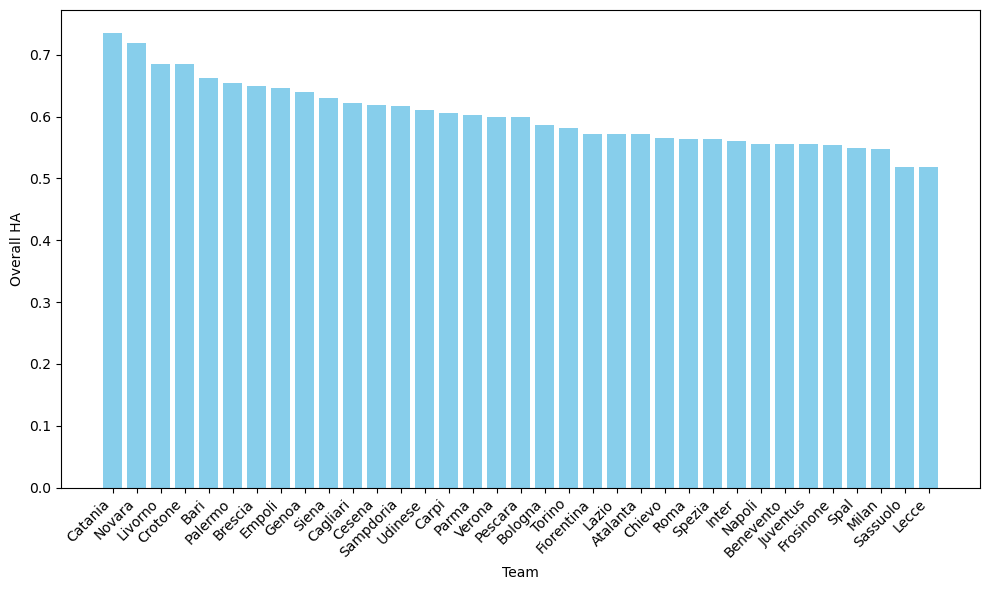

In [25]:
# Sort the DataFrame by OverallHA column in descending order
total_points = total_points.sort_values(by='OverallHA', ascending=False)

# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.bar(total_points['Team'], total_points['OverallHA'], color='skyblue')
plt.xlabel('Team')
plt.ylabel('Overall HA')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

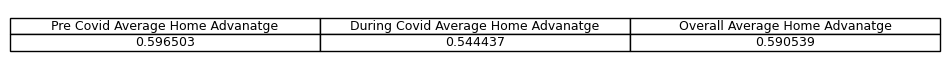

In [26]:
#Pre and during covid average home advantages 
#Calculate the HA for pre covid, during covid and overall, to 6 d.p.
ha_average_pre = round(serie_a.loc[:4049,'HAPreCovid'].mean(),6)
ha_average_during = round(serie_a.loc[4049:,'HADuringCovid'].mean(),6)
ha_average = round(serie_a.loc[:, 'OverallHA'].mean(),6)

#Create a dictoriary to keep the avergaes in 
ha_means = {
            'Pre Covid Average Home Advanatge':[ha_average_pre],
           'During Covid Average Home Advanatge': [ha_average_during],
           'Overall Average Home Advanatge': [ha_average]}
#Create a data frame from the dictionary
ha_means = pd.DataFrame(ha_means)


#Create a figure and axis for displaying the data
fig = plt.figure(figsize = (12,.1))
ax = fig.add_subplot(111)

#Display the table
ax.table(cellText = ha_means.values, 
         colLabels = ha_means.columns, cellLoc='center')


#turn axes off
ax.axis('off')
#Show the plot
plt.show()

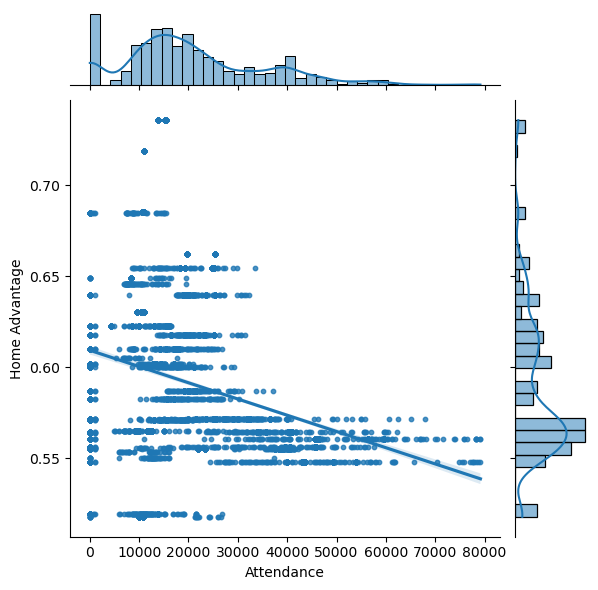

In [27]:
#A join plot using seaborn of attendacne and overallHA
joint_plot = sns.jointplot(x="Attendance", y="OverallHA", data=serie_a, kind='reg', fit_reg=True,scatter_kws={'s': 10})

# Set individual axis labels
joint_plot.set_axis_labels('Attendance', 'Home Advantage')


# Show the plot
plt.show()

# Cluster Analysis 

## Attendance and Pre Covid Home Advanatge

In [28]:
#Creating two new data frames from the columns 'PreCovid'
serie_a_pre_covid = serie_a[serie_a['PreCovid'] == True]
serie_a_during_covid = serie_a[serie_a['PreCovid'] == False]

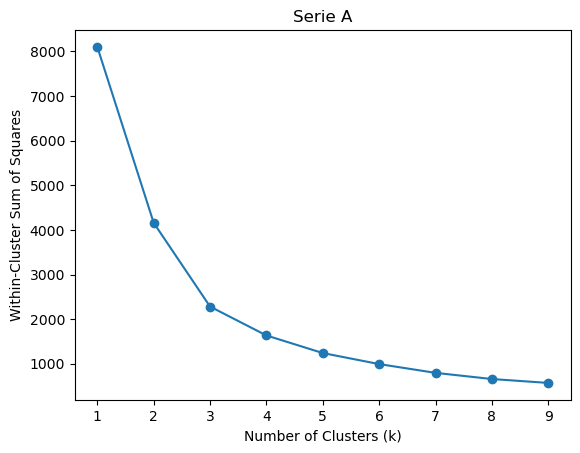

In [30]:
#Extracting the features
select_features = serie_a_pre_covid[['Attendance','HAPreCovid']]

#Scaling the features
scaler = StandardScaler()
select_features_standardised = scaler.fit_transform(select_features)

#Elbow method 
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(select_features_standardised)
    inertia.append(kmeans.inertia_)

#Plot the Elbow Method
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares')
plt.title('Serie A')
plt.show()

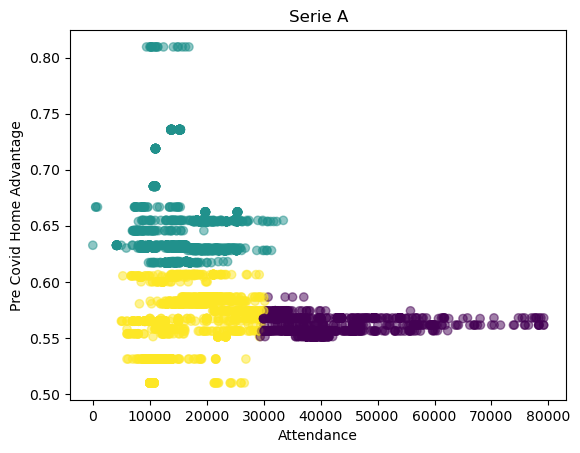

In [31]:
#choosing K
optimal_k = 3

# Apply K-means clustering with the chosen k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
serie_a_pre_covid['Cluster'] = kmeans.fit_predict(select_features_standardised)


#Plot the clusters
plt.scatter(serie_a_pre_covid['Attendance'], serie_a_pre_covid['HAPreCovid'], c=serie_a_pre_covid['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('Attendance')
plt.ylabel('Pre Covid Home Advantage')
plt.title('Serie A')
plt.show()


#cluster summary
cluster_summary = serie_a_pre_covid.groupby('Cluster')[['HAPreCovid', 'Attendance']].mean()
cluster_sizes = serie_a_pre_covid['Cluster'].value_counts().sort_index()

# Round 'Attendance' values to 0 decimal places
cluster_summary['Attendance'] = cluster_summary['Attendance'].round(0)


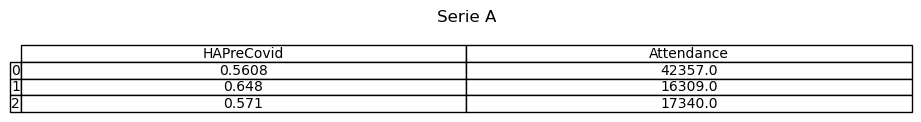

In [32]:
#Displaying the clusters
#Create a figure to show the table
fig = plt.figure(figsize = (11.5, .2))
ax = fig.add_subplot(111)

#Round the summaries to 4 d.p.
cluster_summary = round(cluster_summary,4)

#Display the summary in a table
ax.table(cellText = cluster_summary.values, rowLabels = cluster_summary.index, 
         colLabels = cluster_summary.columns, cellLoc='center')

#Title
ax.set_title('Serie A')
#turn axes off
ax.axis('off')
#Show table
plt.show()

## Match Statistic and Home Advanatge

### Pre Covid

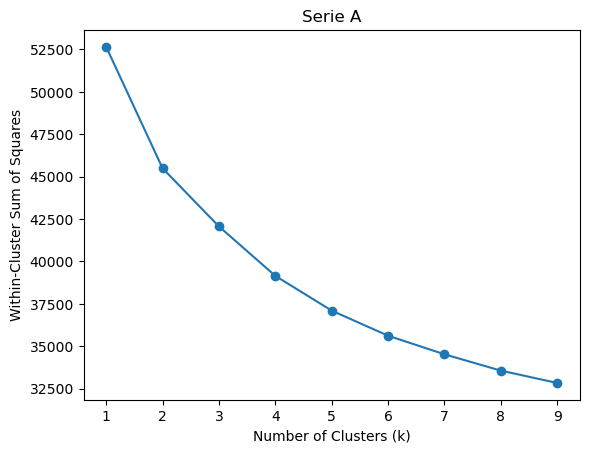

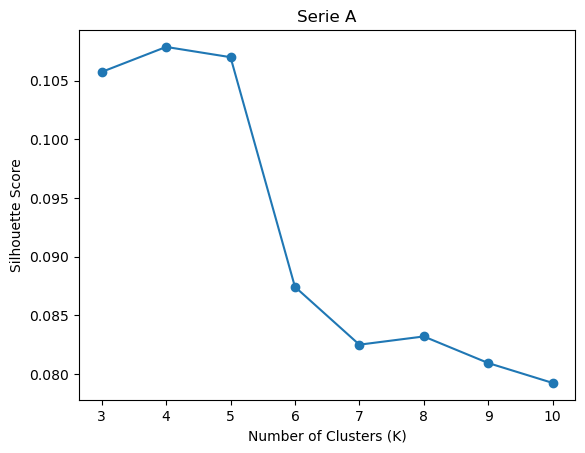

In [33]:
# Select features for clustering
select_features = serie_a_pre_covid[['HS', 'AS', 'HST', 'AST', 'HC','AC','HF', 'AF', 'HY','AY','HR','AR', 'HAPreCovid']]

# Standardise the features
scaler = StandardScaler()
select_features_standardised = scaler.fit_transform(select_features)


#Elbow method 
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(select_features_standardised)
    inertia.append(kmeans.inertia_)

#Plot the Elbow Method
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares')
plt.title('Serie A')
plt.show()



# Evaluate silhouette scores for different values of K
silhouette_scores = []
for k in range(3, 11):  
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(select_features_standardised)
    silhouette_avg = silhouette_score(select_features_standardised, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Method
plt.plot(range(3, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Serie A')
plt.show()

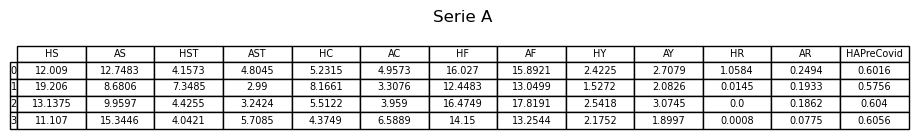

In [34]:
#Optimal k value
optimal_k = 4
#Apply k-means
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
serie_a_pre_covid['Cluster'] = kmeans.fit_predict(select_features_standardised)


#cluster summary 
cluster_summary = serie_a_pre_covid.groupby('Cluster')[[ 'HS', 'AS', 'HST', 'AST', 'HC','AC','HF', 'AF', 'HY','AY','HR','AR','HAPreCovid']].mean()
cluster_summary

#Create a figure displaying the table
fig = plt.figure(figsize = (11.5, .2))
ax = fig.add_subplot(111)
#Round the summaries to 4 d.p.
cluster_summary = round(cluster_summary,4)
#Display the summary in a table
ax.table(cellText = cluster_summary.values, rowLabels = cluster_summary.index, 
         colLabels = cluster_summary.columns, cellLoc='center')

#Title
ax.set_title('Serie A')
#turn axes off
ax.axis('off')
plt.show()

### During Covid

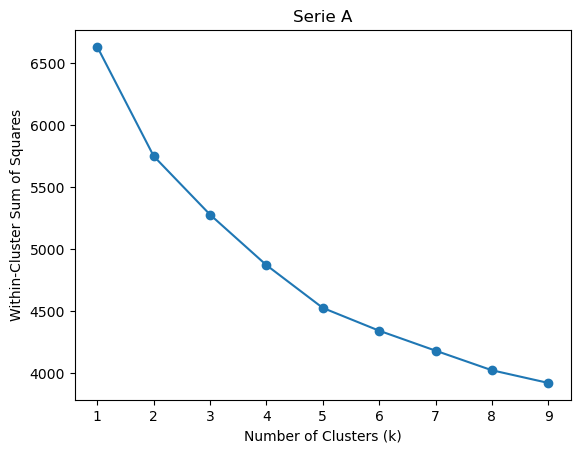

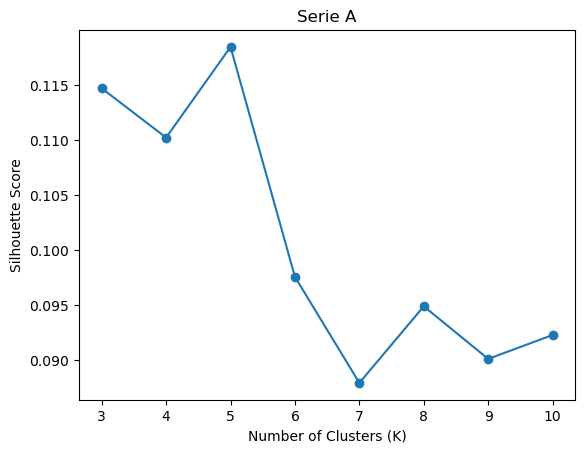

In [35]:
# Select features for clustering
select_features = serie_a_during_covid[['HS', 'AS', 'HST', 'AST', 'HC','AC','HF', 'AF', 'HY','AY','HR','AR','HADuringCovid']]

# Standardise the features
scaler = StandardScaler()
select_features_standardised = scaler.fit_transform(select_features)


#Elbow method 
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(select_features_standardised)
    inertia.append(kmeans.inertia_)

#Plot the Elbow Method
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares')
plt.title('Serie A')
plt.show()



# Evaluate silhouette scores for different values of K
silhouette_scores = []
for k in range(3, 11):  # You can adjust the range as needed
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(select_features_standardised)
    silhouette_avg = silhouette_score(select_features_standardised, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Method
plt.plot(range(3, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Serie A')
plt.show()

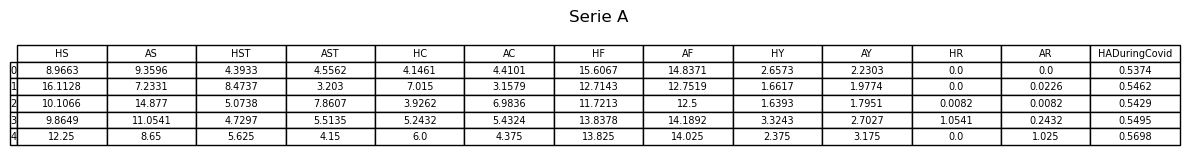

In [36]:
#Optimal value for k
optimal_k = 5
#Apply k-means
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
serie_a_during_covid['Cluster'] = kmeans.fit_predict(select_features_standardised)

#cluster summary 
cluster_summary = serie_a_during_covid.groupby('Cluster')[['HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR','HADuringCovid']].mean()


#Create a figure displaying the table
fig = plt.figure(figsize = (15, .2))
ax = fig.add_subplot(111)

#Round the summaries to 4d.p.
cluster_summary = round(cluster_summary,4)


#Display the summary in a table
ax.table(cellText = cluster_summary.values, rowLabels = cluster_summary.index, 
         colLabels = cluster_summary.columns, cellLoc='center')

#Title
ax.set_title('Serie A')
#Turn the axes off
ax.axis('off')
#Show table
plt.show()